In [1]:
push!(LOAD_PATH, "$(pwd())/../src"); using PyPlot, StatsBase, Distributions, StochasticProcesses;

# Ito's Integral and Its Properties

`ItoIntegral(f)`: 

$$ y(t) = \int_{0}^{t} f(t, b) dB $$

$ \int_0^t t^2 dB $

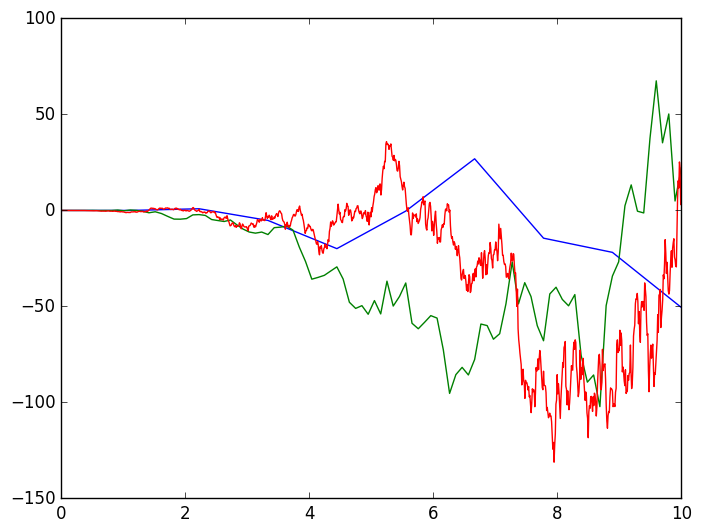

In [3]:
for n in [10, 100, 1000]
    t=linspace(0., 10., n)
    plot(t, cumsim(ItoIntegral((t, b)->t.^2), t))
end

Ito integral converges:

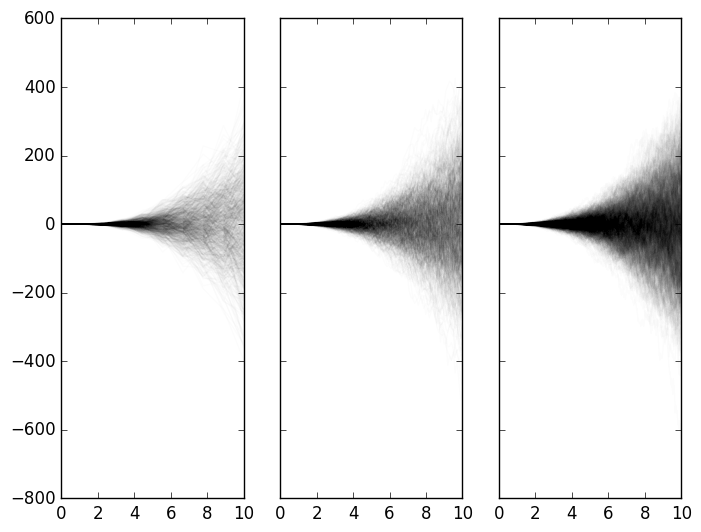

In [4]:
let nn=[10, 100, 1000]
    fig, axis = subplots(1, length(nn), sharey=true)
    for (i, n) in enumerate(nn)
        t=linspace(0., 10., n)
        axis[i][:plot](t, cumsim(ItoIntegral((t,b)->t.^2), t, 1000), color=(0, 0, 0, .01))
    end
end;

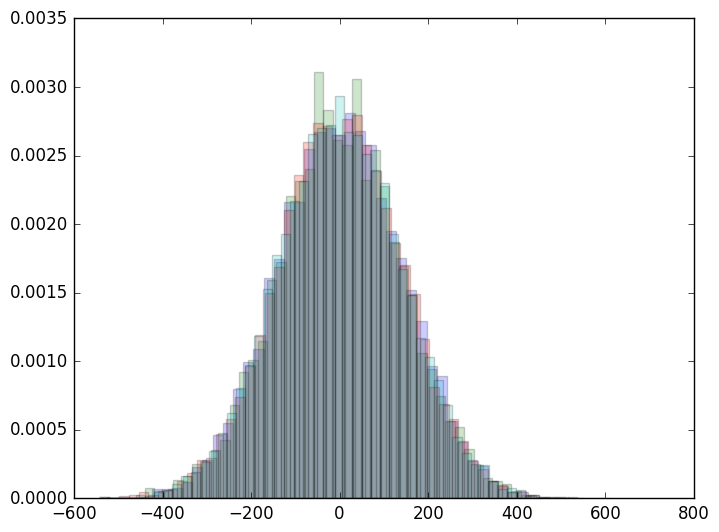

In [5]:
# todo: compare to analytical solution (is there any?)
for n in [1000, 2000, 4000, 8000]
    t=linspace(0., 10., n)
    plt[:hist](sim(ItoIntegral((t,b)->t.^2), t, 10000), alpha=0.2, bins=50, normed=true)
end;

$ \int sin(t) dB $

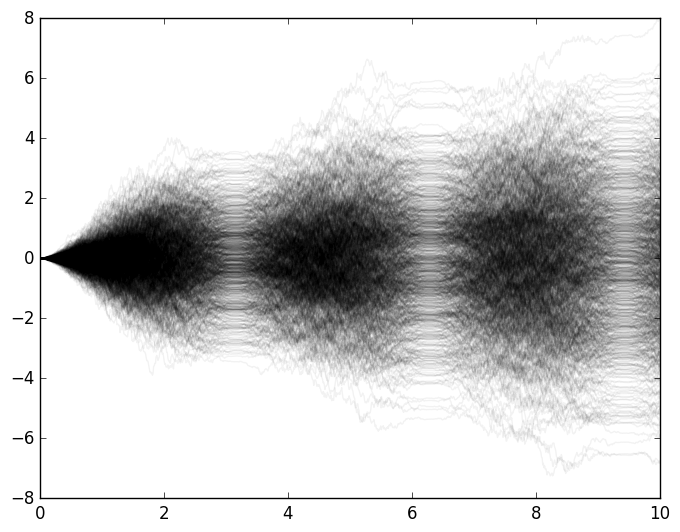

In [7]:
let t=linspace(0.,10,1000)
    plot(t, cumsim(ItoIntegral((t,b)->sin(t)), t, 1000), color=(0, 0, 0, .05))
end;

## Ito's Lemma

Assume $ dy = f dt + g dB$, then if $F(t,y)$ is twice differentiable:
$ dF(t, y) = \left(\frac{\partial F}{\partial t}+ f \frac{\partial F}{\partial y} + \frac{g^2}{2} \frac{\partial^2 F}{\partial y^2} \right) dt +  g \frac{\partial F}{\partial y}dB$ 

For ordinary integrals $d(t^2)=2t dt$:

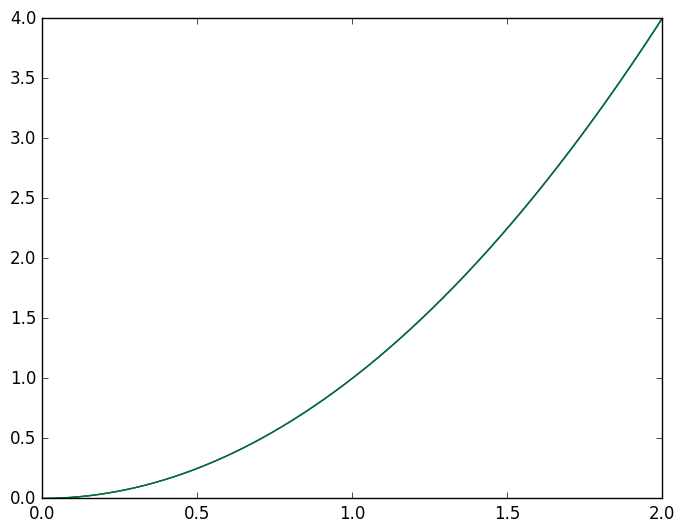

In [8]:
let t0=0.0, t1=2.0, n=1000, t=linspace(t0,t1,n)
    plot(t, cumsim(CompositeProcess(ItoProcess((t,dt,b,db,y)->dt, 0.), (t, y)->y.^2), t))
    plot(t, cumsim(ItoProcess((t,dt,b,db,y)->2 * t * dt, 0.), t))
end;

For stochastic integrals $d(y^2) \neq 2ydB$ but $ d(y^2) = dt + 2 y dB$

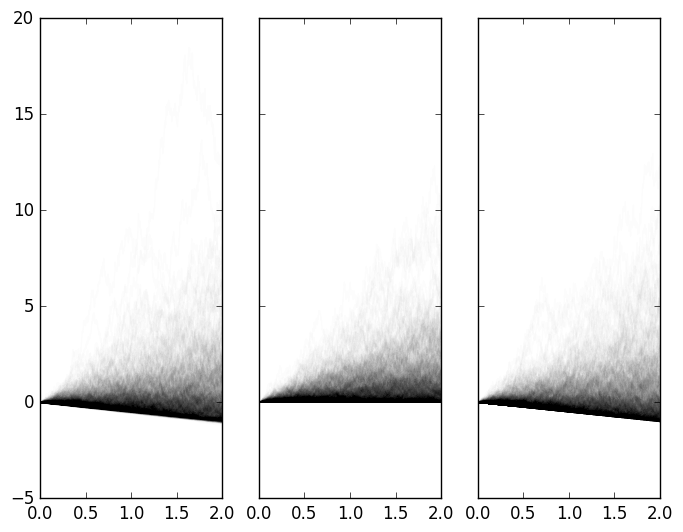

In [9]:
fig, axis = subplots(1, 3, sharey=true)
let t0=0.0, t1=2.0, n=1000, t=linspace(t0,t1,n)
    axis[1][:plot](t, cumsim(ItoIntegral((t,b)->b), t, 1000), color=(0,0,0,.01))
    axis[2][:plot](t, cumsim(CompositeProcess(ItoIntegral((t,b)->1), (t, y)->y.^2/2), t, 1000), color=(0,0,0,.01))
    axis[3][:plot](t, cumsim(CompositeProcess(ItoIntegral((t,b)->1), (t, y)->(y.^2 - t) / 2), t, 1000), color=(0,0,0,.01))
end;

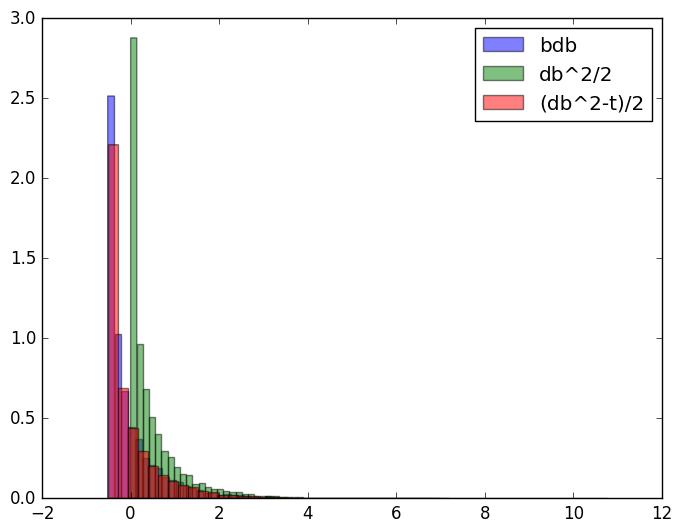

In [10]:
let t=linspace(0., 1., 10000)
    plt[:hist](sim(ItoIntegral((t,b)->b), t, 10000),label="bdb", alpha=.5, bins=50, normed=true);
    plt[:hist](sim(CompositeProcess(ItoIntegral((t,b)->1), (t, y)->y.^2/2), t, 10000), label="db^2/2", alpha=.5, bins=50, normed=true);
    plt[:hist](sim(CompositeProcess(ItoIntegral((t,b)->1), (t, y)->(y.^2 - t) / 2), t, 10000), label="(db^2-t)/2", alpha=.5, bins=50, normed=true);
    legend()
end;